In [ ]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


In [174]:
df=pd.read_excel('Test.xlsx')

**1. Data Cleaning**

In [153]:
# This will return us the top 5 values of the DataFrame 
df.head()   

,evnt_dt,page_name,EXPERIMENTATION_EXPERIENCE,EXPERIMENTATION_TREATMENT,page_country,link_name,devc_type,referring_url,evnt_page_url,utm_source,utm_medium,utm_campaign,utm_content,Sessions,Impressions,Total_Clicks
0,2021-02-20,Dummy1,103319.0,113155,us,#,Mobile Phone,https://f9ef11867e527110601bc9d5cd456735.safef...,https://www.amazon.com/us/business,#,#,#,#,1,1,0
1,2021-02-19,Dummy2,103319.0,113154,us,#,Desktop,#,https://www.amazon.com/us/enterprise/streamlin...,Banner,paid,Streamline_Operations,b300x600,1,1,0
2,2021-02-20,Dummy3,NaN,113155,us,CommercePlatformEnhancedFooter-Link-SMB-Gettin...,Mobile Phone,https://www.amazon.com/webapps/mpp/enterprise,https://www.amazon.com/us/business/getting-sta...,#,#,#,#,2,2,0
3,2021-02-20,Dummy4,NaN,113155,us,#currency_conversion,Mobile,#,https://www.amazon.com/us/business,#,#,#,#,1,1,0
4,2021-02-20,Dummy5,103319.0,113155,us,#,Mobile Phone,https://en.kueez.com/,https://www.amazon.com/us/business/accept-paym...,#,#,#,#,14,14,0


In [175]:
# This will give us the nan values present in DataFrame
print(df.isnull().sum())   

evnt_dt                       0
page_name                     0
EXPERIMENTATION_EXPERIENCE    2
EXPERIMENTATION_TREATMENT     0
page_country                  0
link_name                     0
devc_type                     0
referring_url                 0
evnt_page_url                 0
utm_source                    0
utm_medium                    0
utm_campaign                  0
utm_content                   0
Sessions                      0
Impressions                   0
Total_Clicks                  0
dtype: int64


As we can see that our DataFrame has the **Nan** so we will write a function to remove **Nan** Values



In [176]:
#This function will remove the nan values from the DataFrame

def drop_nan(df_name):
  df_name=df_name.dropna()
  return df_name


As we can see our function has removed all Nan Values 

In [177]:
df=drop_nan(df)   # drop_nan()
df.isnull().sum()

evnt_dt                       0
page_name                     0
EXPERIMENTATION_EXPERIENCE    0
EXPERIMENTATION_TREATMENT     0
page_country                  0
link_name                     0
devc_type                     0
referring_url                 0
evnt_page_url                 0
utm_source                    0
utm_medium                    0
utm_campaign                  0
utm_content                   0
Sessions                      0
Impressions                   0
Total_Clicks                  0
dtype: int64

We want to convert the Default date format **YY-MM-DD**

In [157]:
def convert_date(df_name):
  df_name.evnt_dt.apply(lambda x: x.strftime('%Y%m%d')).astype(int)
  return df_name

In [158]:
df=convert_date(df)  # convert_date()
df.head()

,evnt_dt,page_name,EXPERIMENTATION_EXPERIENCE,EXPERIMENTATION_TREATMENT,page_country,link_name,devc_type,referring_url,evnt_page_url,utm_source,utm_medium,utm_campaign,utm_content,Sessions,Impressions,Total_Clicks
0,2021-02-20,Dummy1,103319.0,113155,us,#,Mobile Phone,https://f9ef11867e527110601bc9d5cd456735.safef...,https://www.amazon.com/us/business,#,#,#,#,1,1,0
1,2021-02-19,Dummy2,103319.0,113154,us,#,Desktop,#,https://www.amazon.com/us/enterprise/streamlin...,Banner,paid,Streamline_Operations,b300x600,1,1,0
4,2021-02-20,Dummy5,103319.0,113155,us,#,Mobile Phone,https://en.kueez.com/,https://www.amazon.com/us/business/accept-paym...,#,#,#,#,14,14,0
5,2021-02-20,Dummy6,103319.0,113154,43,#,Mobile Phone,https://duckduckgo.com,https://www.amazon.com/business,bing,cpc,BUS_TM_PROSP_NA_US_EN_B_SEM_MERC_SU_Business A...,BUS_TM_PROSP_SU_Business Account-Only_BM,1,1,0
6,2021-02-19,Dummy1,103319.0,113155,us,#,Mobile Phone,https://9cf0ea0a913e7180781ced518eb19939.safef...,3,Banner,paid,Streamline_Operations,a300x250,1,1,0


Suppose in our data **Anomalies** will be there like int in str. So we will write a function to remove the **Anomalies**


Ex- **5th Row** and  **5th column** (**page_country**)

In [146]:
df.head()

,evnt_dt,page_name,EXPERIMENTATION_EXPERIENCE,EXPERIMENTATION_TREATMENT,page_country,link_name,devc_type,referring_url,evnt_page_url,utm_source,utm_medium,utm_campaign,utm_content,Sessions,Impressions,Total_Clicks
0,2021-02-20,Dummy1,103319.0,113155,us,#,Mobile Phone,https://f9ef11867e527110601bc9d5cd456735.safef...,https://www.amazon.com/us/business,#,#,#,#,1,1,0
1,2021-02-19,Dummy2,103319.0,113154,us,#,Desktop,#,https://www.amazon.com/us/enterprise/streamlin...,Banner,paid,Streamline_Operations,b300x600,1,1,0
4,2021-02-20,Dummy5,103319.0,113155,us,#,Mobile Phone,https://en.kueez.com/,https://www.amazon.com/us/business/accept-paym...,#,#,#,#,14,14,0
5,2021-02-20,Dummy6,103319.0,113154,43,#,Mobile Phone,https://duckduckgo.com,https://www.amazon.com/business,bing,cpc,BUS_TM_PROSP_NA_US_EN_B_SEM_MERC_SU_Business A...,BUS_TM_PROSP_SU_Business Account-Only_BM,1,1,0
6,2021-02-19,Dummy1,103319.0,113155,us,#,Mobile Phone,https://9cf0ea0a913e7180781ced518eb19939.safef...,3,Banner,paid,Streamline_Operations,a300x250,1,1,0


In [166]:
def int_outlier_in_str(df_name,col):
  for i in col:
    df_name[i] = df_name[i].str.strip(string.digits)
  return df_name

In [167]:
col=['evnt_page_url','page_country']
df=int_outlier_in_str(df,col)               # Remove int value from str columns
df.head()

,evnt_dt,page_name,EXPERIMENTATION_EXPERIENCE,EXPERIMENTATION_TREATMENT,page_country,link_name,devc_type,referring_url,evnt_page_url,utm_source,utm_medium,utm_campaign,utm_content,Sessions,Impressions,Total_Clicks
0,2021-02-20,Dummy1,103319.0,113155,us,#,Mobile Phone,https://f9ef11867e527110601bc9d5cd456735.safef...,https://www.amazon.com/us/business,#,#,#,#,1,1,0
1,2021-02-19,Dummy2,103319.0,113154,us,#,Desktop,#,https://www.amazon.com/us/enterprise/streamlin...,Banner,paid,Streamline_Operations,b300x600,1,1,0
4,2021-02-20,Dummy5,103319.0,113155,us,#,Mobile Phone,https://en.kueez.com/,https://www.amazon.com/us/business/accept-paym...,#,#,#,#,14,14,0
5,2021-02-20,Dummy6,103319.0,113154,NaN,#,Mobile Phone,https://duckduckgo.com,https://www.amazon.com/business,bing,cpc,BUS_TM_PROSP_NA_US_EN_B_SEM_MERC_SU_Business A...,BUS_TM_PROSP_SU_Business Account-Only_BM,1,1,0
6,2021-02-19,Dummy1,103319.0,113155,us,#,Mobile Phone,https://9cf0ea0a913e7180781ced518eb19939.safef...,NaN,Banner,paid,Streamline_Operations,a300x250,1,1,0


We will drop Nan values which are convert nan by removing anomalies

In [168]:
df=drop_nan(df)

Suppose in our data **Anomalies** will be there like str in int. So we will write a function to remove the **Anomalies**

As we dont have any columns like this so we will only write the function

In [150]:
def str_outlier_in_int(df_name,col):
  for i in col:
    df_name[i] = df_name[i].apply(pd.to_numeric, errors='coerce')
  return df_name

Now our Data Might have the outliers.So Inorder to detect and remove it will write a function.

We will be using Interquartile Range (**IQR**)

In [ ]:
def detection(df,features):
    outlier_indices=[]
    
    for c in features:
        
        Q1 = np.percentile(df[c],25)
        
        
        Q3 = np.percentile(df[c],75)
        
        
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        lower_range = Q1 - (outlier_step)
        upper_range = Q3 + (outlier_step)
        
                                         
        outlier_list_col=df[  (df[c] < lower_range) | (df[c] > upper_range)  ].index
       
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1 )
    
    
    return multiple_outliers

In [ ]:
num_col=['EXPERIMENTATION_EXPERIENCE','EXPERIMENTATION_TREATMENT','Sessions','Impressions']

In [ ]:
new_df=df[num_col]

In [ ]:
new_df

,EXPERIMENTATION_EXPERIENCE,EXPERIMENTATION_TREATMENT,Sessions,Impressions
0,103319.0,113155,1,1
1,103319.0,113154,1,1
4,103319.0,113155,14,14
8,103319.0,113155,1,1


In [ ]:
outliers=detection(new_df,num_col)

Our **outlier** has been **detected** And we will be **removing** it.

In [ ]:
df.loc[outliers] 

,evnt_dt,page_name,EXPERIMENTATION_EXPERIENCE,EXPERIMENTATION_TREATMENT,page_country,link_name,devc_type,referring_url,evnt_page_url,utm_source,utm_medium,utm_campaign,utm_content,Sessions,Impressions,Total_Clicks
4,2021-02-20,Dummy5,103319.0,113155,us,#,Mobile Phone,https://en.kueez.com/,https://www.amazon.com/us/business/accept-paym...,#,#,#,#,14,14,0


In [ ]:
df=df.drop(outliers,axis=0).reset_index(drop = True)

***2. Visualization***

 As here the data is in small amount so we will basically plot only the plots of same kind

In [161]:
df.head()

,evnt_dt,page_name,EXPERIMENTATION_EXPERIENCE,EXPERIMENTATION_TREATMENT,page_country,link_name,devc_type,referring_url,evnt_page_url,utm_source,utm_medium,utm_campaign,utm_content,Sessions,Impressions,Total_Clicks
0,2021-02-20,Dummy1,103319.0,113155,us,#,Mobile Phone,https://f9ef11867e527110601bc9d5cd456735.safef...,https://www.amazon.com/us/business,#,#,#,#,1,1,0
1,2021-02-19,Dummy2,103319.0,113154,us,#,Desktop,#,https://www.amazon.com/us/enterprise/streamlin...,Banner,paid,Streamline_Operations,b300x600,1,1,0
4,2021-02-20,Dummy5,103319.0,113155,us,#,Mobile Phone,https://en.kueez.com/,https://www.amazon.com/us/business/accept-paym...,#,#,#,#,14,14,0
5,2021-02-20,Dummy6,103319.0,113154,43,#,Mobile Phone,https://duckduckgo.com,https://www.amazon.com/business,bing,cpc,BUS_TM_PROSP_NA_US_EN_B_SEM_MERC_SU_Business A...,BUS_TM_PROSP_SU_Business Account-Only_BM,1,1,0
6,2021-02-19,Dummy1,103319.0,113155,us,#,Mobile Phone,https://9cf0ea0a913e7180781ced518eb19939.safef...,3,Banner,paid,Streamline_Operations,a300x250,1,1,0


This will give us details of the ***evnt_dt***

In [163]:
df.evnt_dt.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                       7
unique                      2
top       2021-02-20 00:00:00
freq                        5
first     2021-02-19 00:00:00
last      2021-02-20 00:00:00
Name: evnt_dt, dtype: object

This will give us details of the ***page_name***

In [ ]:
df.page_name.unique()

array(['Dummy1', 'Dummy2', 'Dummy6', 'Dummy3'], dtype=object)

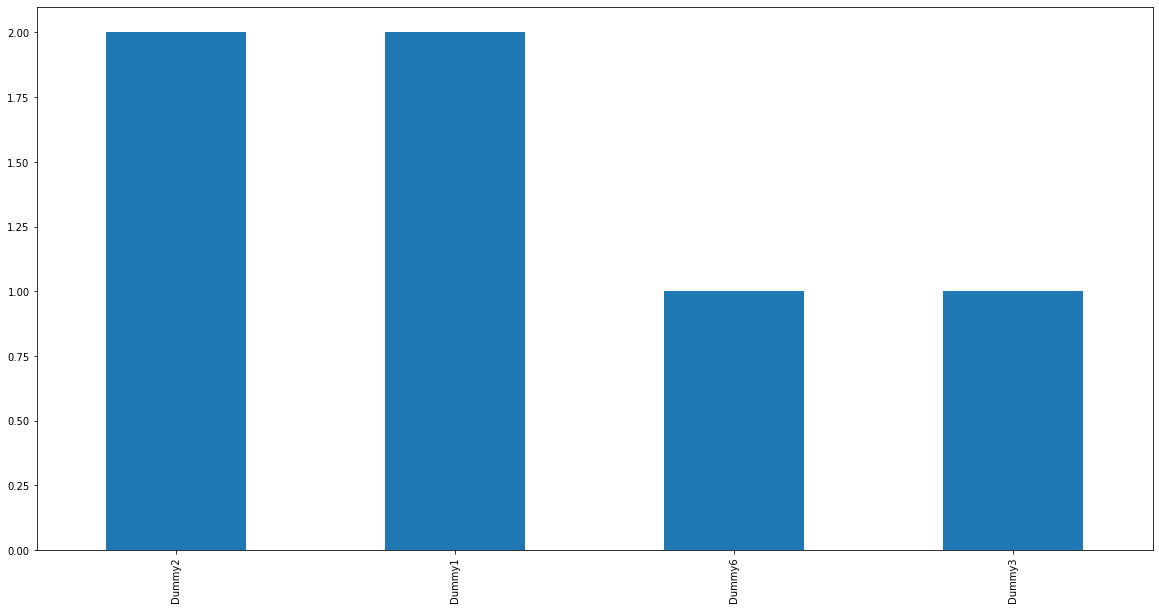

In [ ]:
plt.figure(figsize=(20,10))
df.page_name.value_counts().plot.bar()
plt.show()

This will give us details of the ***EXPERIMENTATION_EXPERIENCE***

Here only **103319.0** is only used.

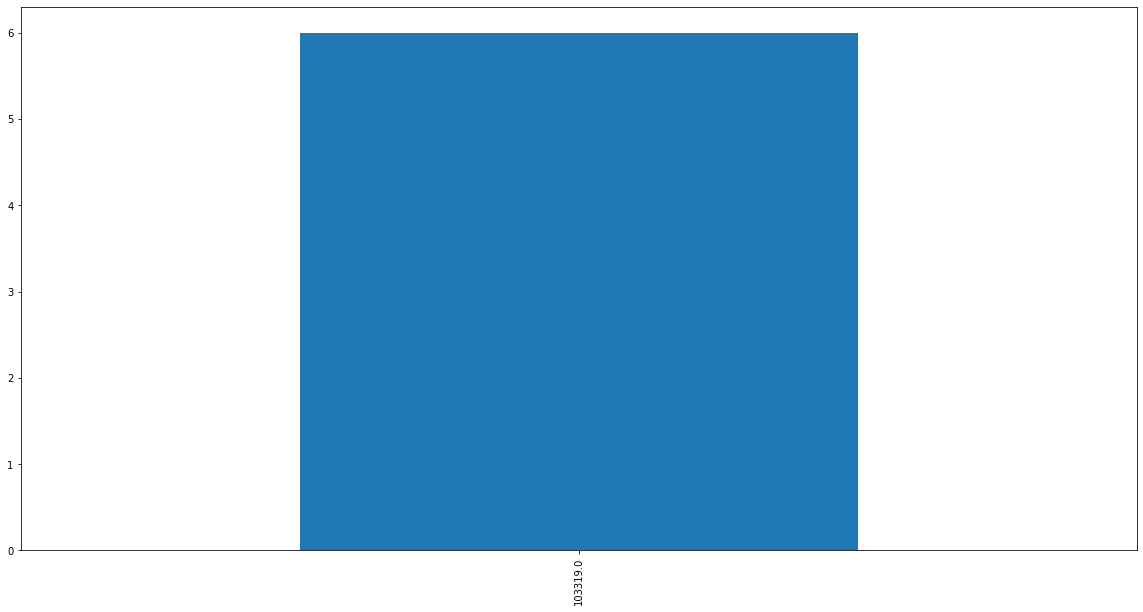

In [ ]:
plt.figure(figsize=(20,10))
df.EXPERIMENTATION_EXPERIENCE.value_counts().plot.bar()
plt.show()

This will give us details of the EXPERIMENTATION_TREATMENT

Here two values are ony used :

1.   **113155**
2.   **113154**



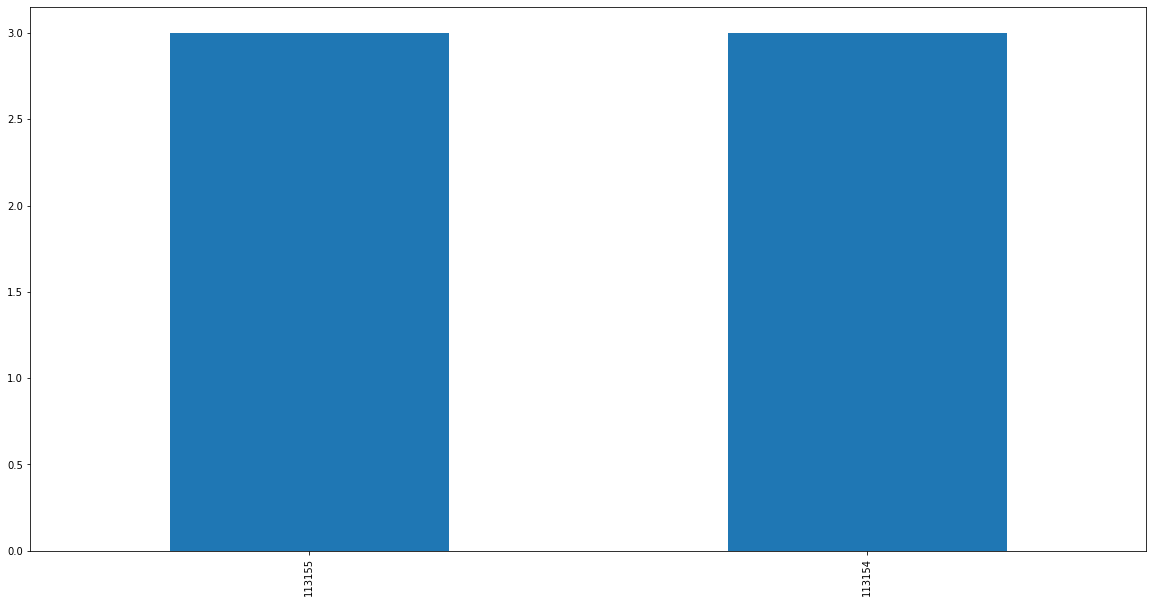

In [ ]:
plt.figure(figsize=(20,10))
df.EXPERIMENTATION_TREATMENT.value_counts().plot.bar()
plt.show()

This will give us details of the ***page_country***

Here only **us** is used.



In [169]:
page=df.page_country.dropna()

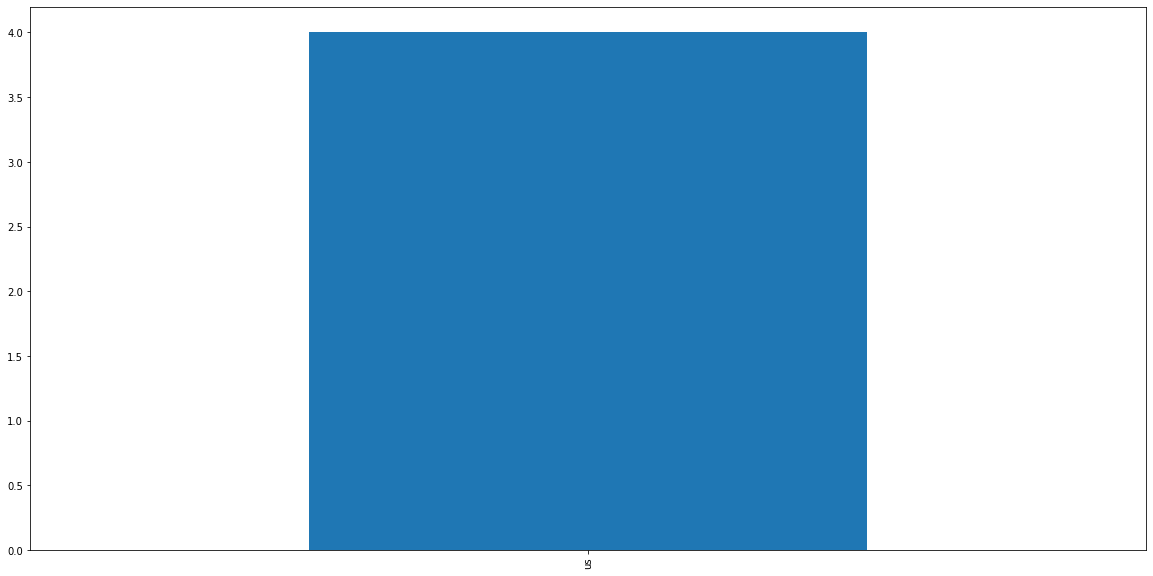

In [170]:
plt.figure(figsize=(20,10))
page.value_counts().plot.bar()
plt.show()

This will give us details of the ***devc_type***

Here two values are ony used :



1.   **Mobile Phone** -- Most users use Mobile Phone
2.   **Desktop** 



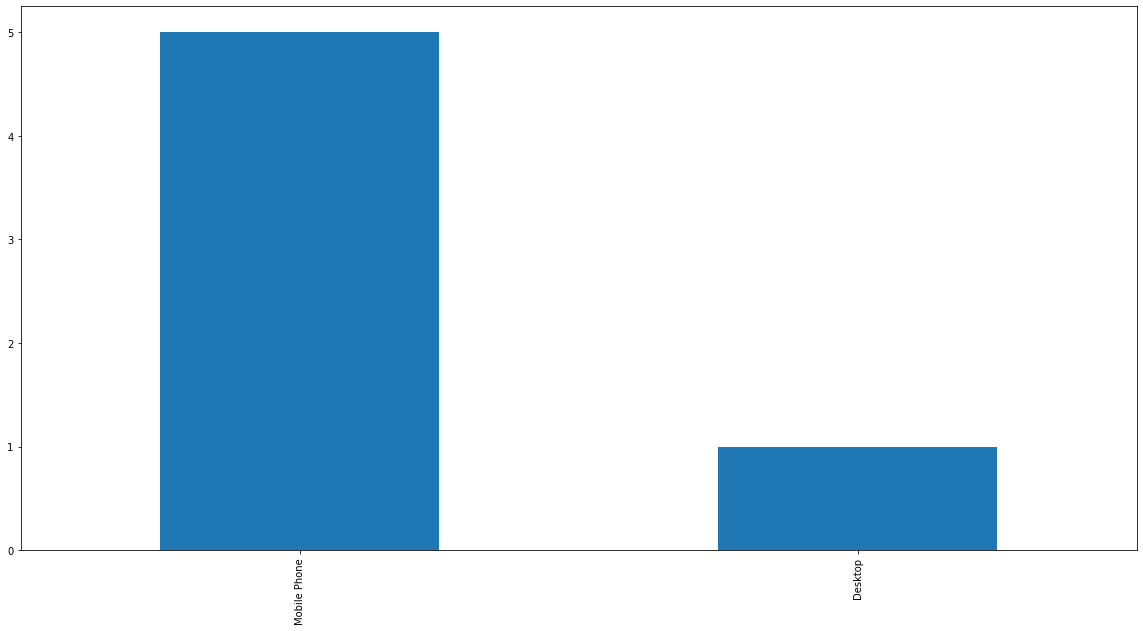

In [ ]:
plt.figure(figsize=(20,10))
df.devc_type.value_counts().plot.bar()
plt.show()

This will give us details of the ***utm_source***

Here two values are ony used :


1. **Banner**
2. **Native** 

 
**#** is not a category


In [171]:
df.utm_source.unique()

array(['#', 'Banner', 'Native'], dtype=object)

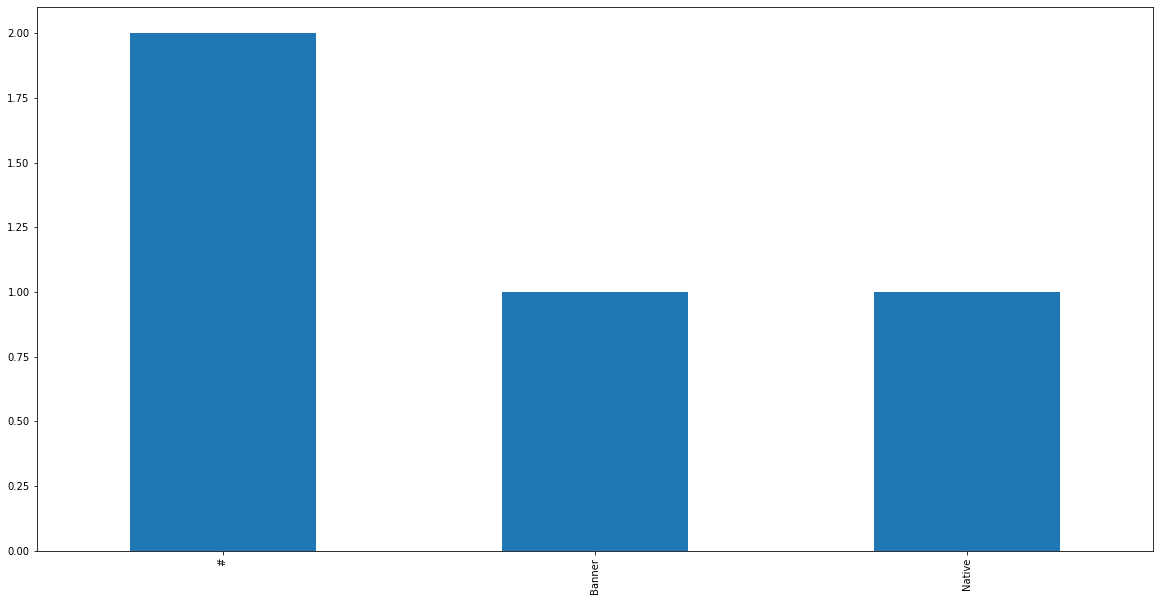

In [172]:
plt.figure(figsize=(20,10))
df.utm_source.value_counts().plot.bar()
plt.show()

This will give us details of the ***utm_medium***

Here two values are ony used :


1. **Email**
2. **Cpc**
3. **Paid** 

 
**#** is not a category

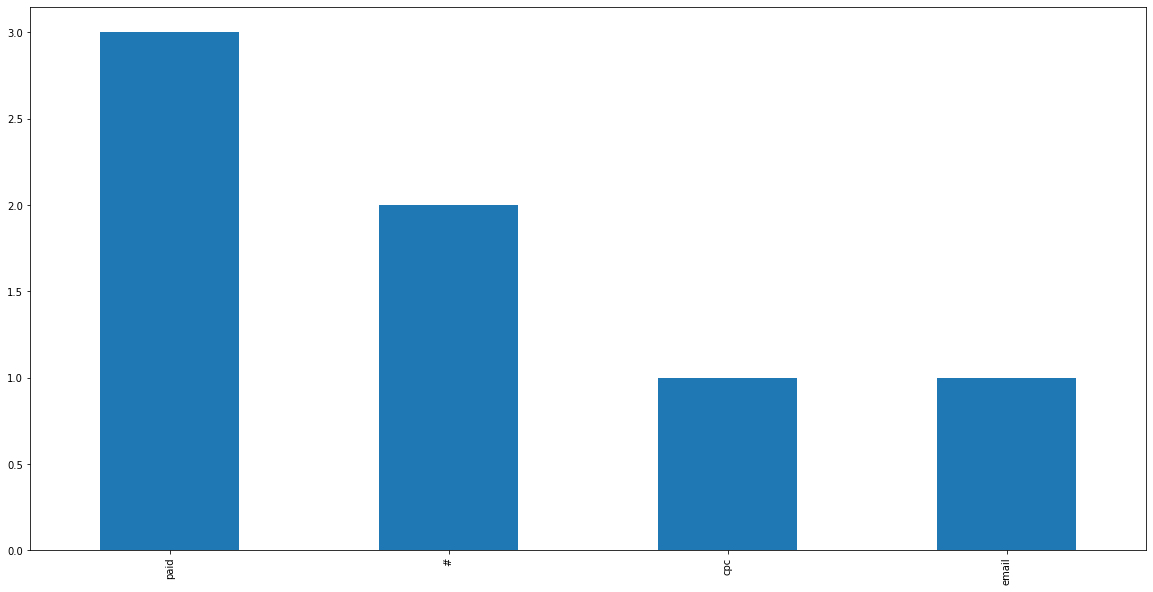

In [178]:
plt.figure(figsize=(20,10))
df.utm_medium.value_counts().plot.bar()
plt.show()

This will give us details of the ***Sessions***

only **1** is the value used.

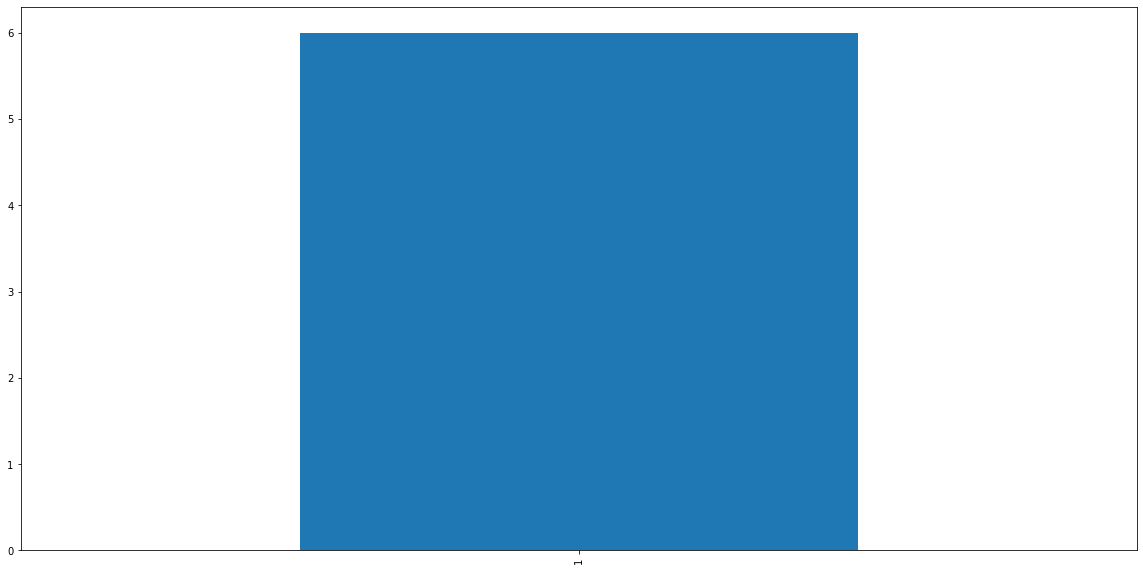

In [ ]:
plt.figure(figsize=(20,10))
df.Sessions.value_counts().plot.bar()
plt.show()

This will give us details of the ***Impressions***

only **1** is the value used.

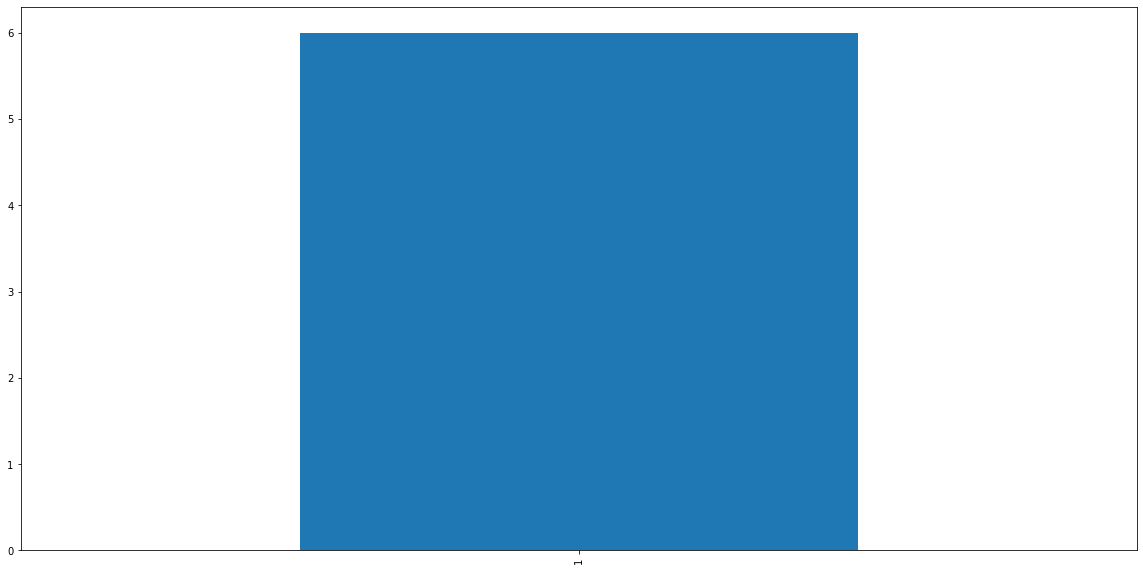

In [ ]:
plt.figure(figsize=(20,10))
df.Impressions.value_counts().plot.bar()
plt.show()

This will give us details of the ***Total_Clicks***

only **0** is the value used.

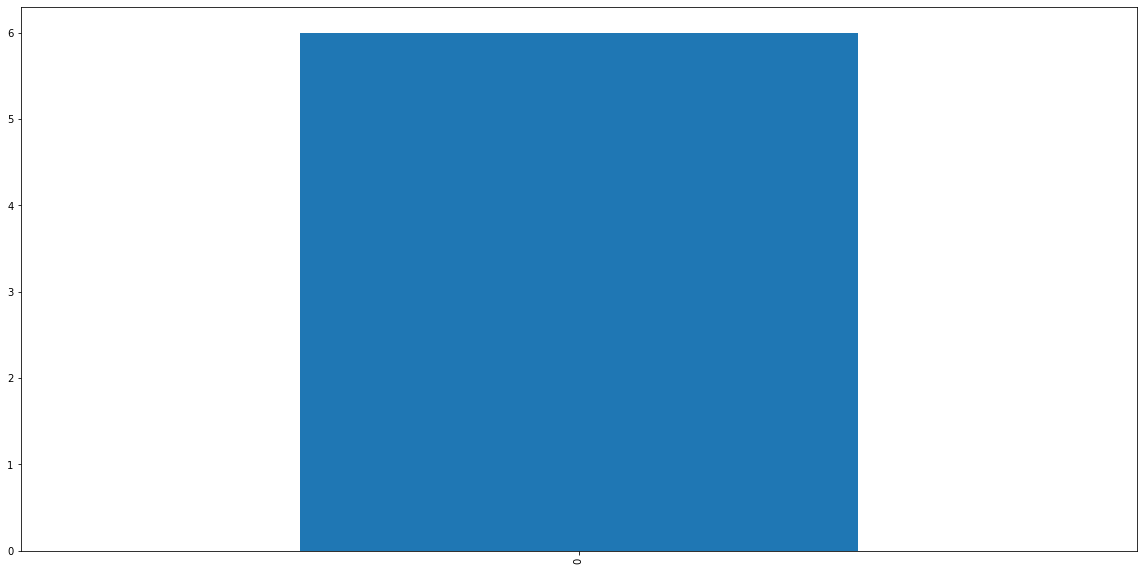

In [ ]:
plt.figure(figsize=(20,10))
df.Total_Clicks.value_counts().plot.bar()
plt.show()

This will give us details of the ***link_name***

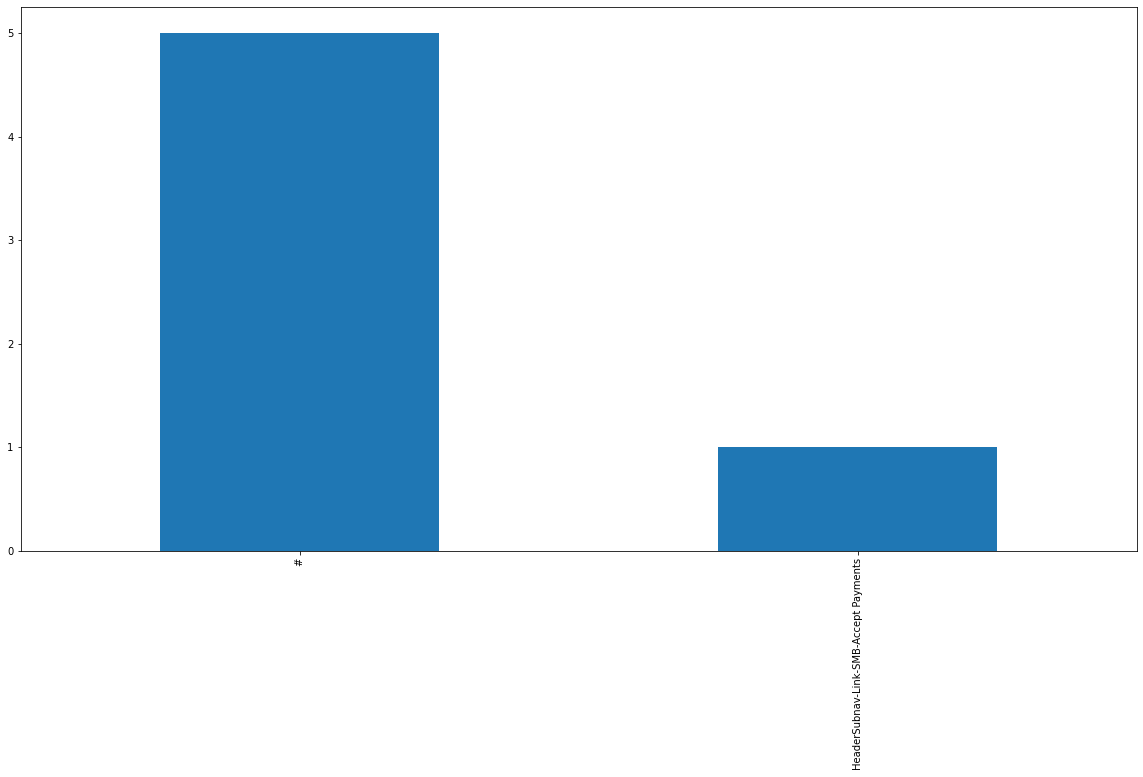

In [ ]:
plt.figure(figsize=(20,10))
df.link_name.value_counts().plot.bar()
plt.show()


This will give us details of the ***referring_url***

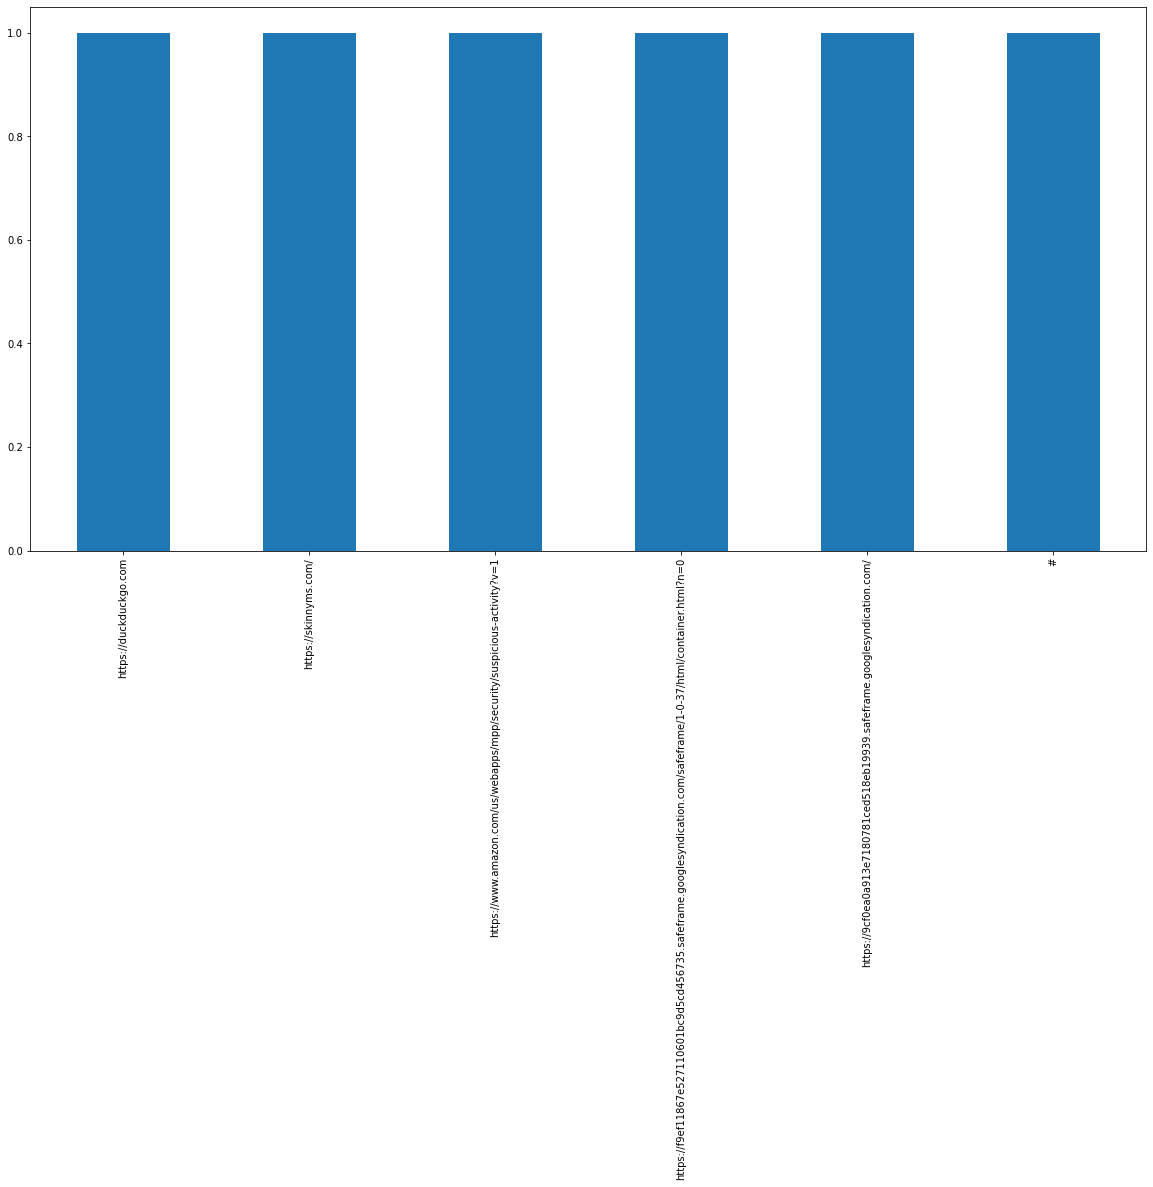

In [ ]:
plt.figure(figsize=(20,10))
df.referring_url.value_counts().plot.bar()
plt.show()


This will give us details of the ***evnt_page_url***

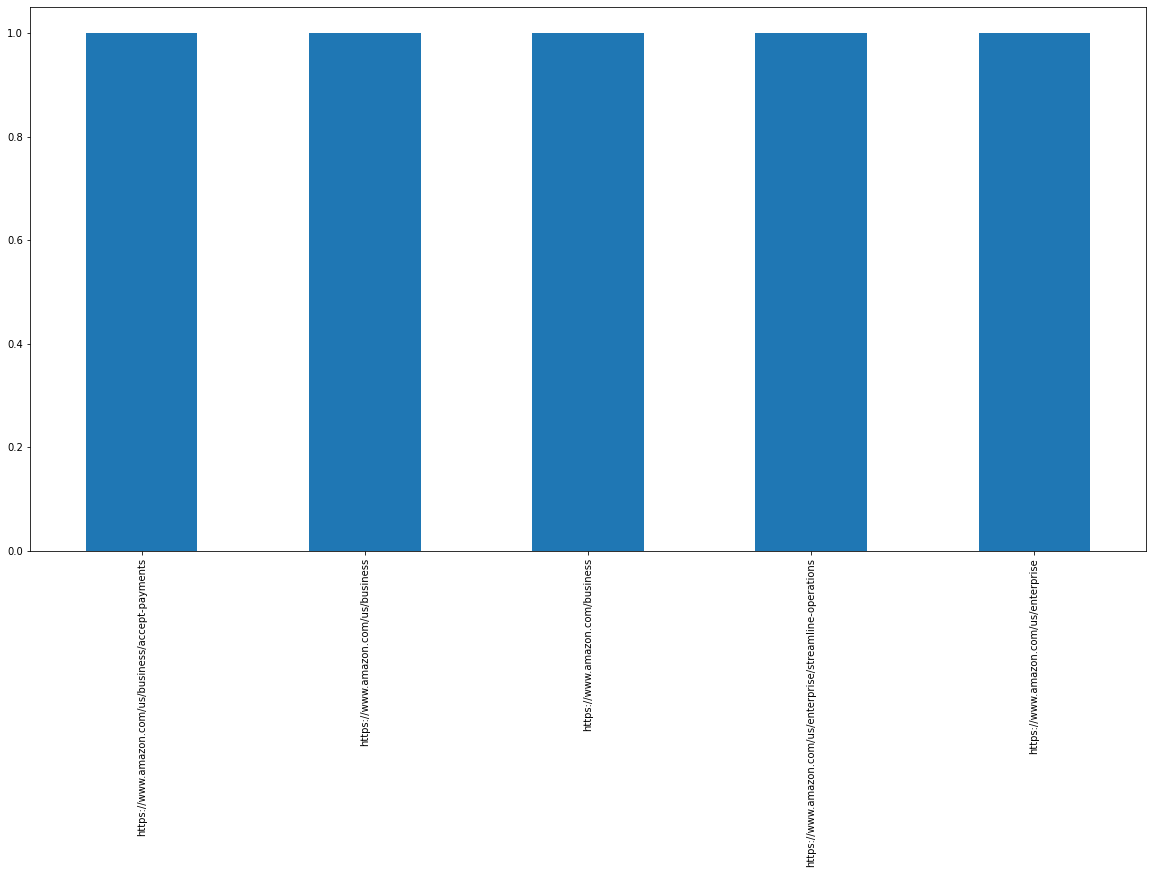

In [ ]:
plt.figure(figsize=(20,10))
df.evnt_page_url.value_counts().plot.bar()
plt.show()


This will give us details of the ***utm_campaign***

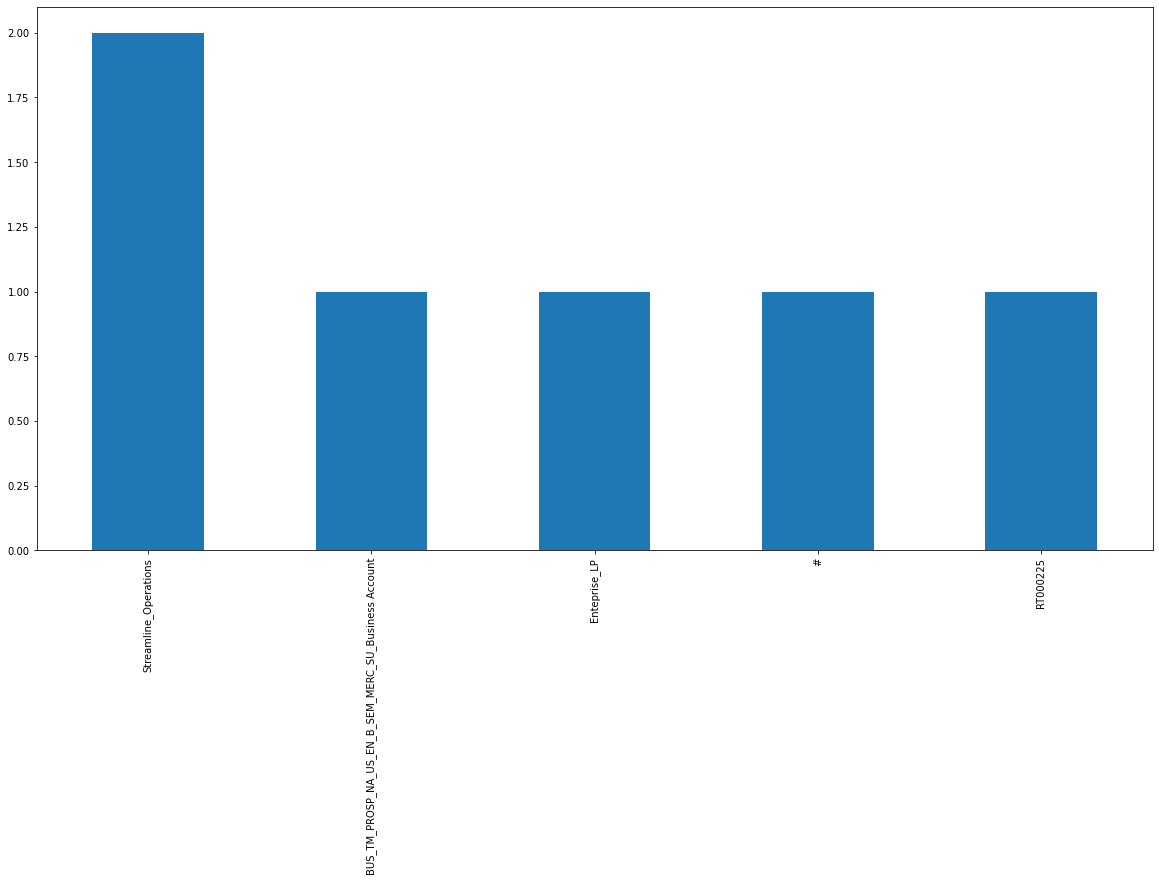

In [ ]:
plt.figure(figsize=(20,10))
df.utm_campaign.value_counts().plot.bar()
plt.show()


This will give us details of the ***utm_content***

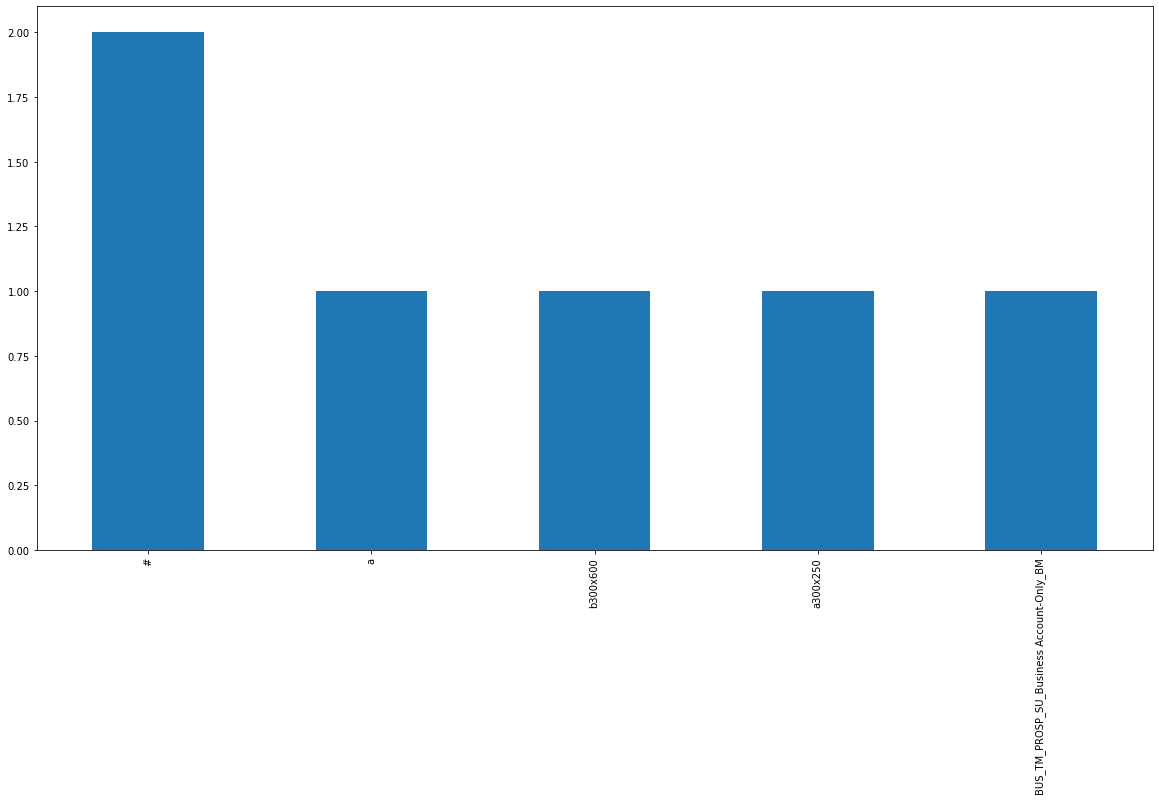

In [ ]:

plt.figure(figsize=(20,10))
df.utm_content.value_counts().plot.bar()
plt.show()